In [34]:
import numpy as np
import scipy
import matplotlib.pylab as plt
import math

In [35]:
def orient(l,w,h):

    #everything under the sun:
    #roll = 0
    roll = np.random.uniform(low=-180, high=180)
    """ usual range in aersospace operations. Angle of 0 means everything is level. 180 = upside down.
        low ≤ x < high for np.random.uniform
    """
    #pitch = 0
    pitch = np.random.uniform(low=-180, high=180)
    """ kind of weird to think about. 90 is nose straight up, -90 is nose straight down. Everything after that means your plane is cooked
        low ≤ x < high for np.random.uniform
    """
    yaw = 0
    #yaw = np.random.uniform(low=-180, high=180)
    #""" 0 is nose forward, +90 is nose to the right (starboard), -90 is nose to the left (port), +180/-180 nose is backwards
    #    low ≤ x < high for np.random.uniform
    #"""



    #################################################

    phi = np.radians(roll)  # Roll ( around X-axis)
    theta = np.radians(pitch) # Pitch ( around Y-axis)
    psi = np.radians(yaw)   # Yaw ( around Z-axis)

    R_x = np.array([ # Rotation matrix for R_x (roll) // no adjustment, positive roll = right wing down/left wing up
        [1, 0, 0],
        [0, np.cos(phi), -np.sin(phi)],
        [0, np.sin(phi), np.cos(phi)]
    ])
    
    R_y = np.array([ # Rotation matrix for R_y (pitch) // adjusted so that positive pitch = pitch up
        [np.cos(theta), 0, -np.sin(theta)],
        [0, 1, 0],
        [np.sin(theta), 0, np.cos(theta)]
    ])
    
    R_z = np.array([ # Rotation matrix for R_z (yaw) // adjusted so positive yaw is cw
        [np.cos(psi), np.sin(psi), 0],
        [-np.sin(psi), np.cos(psi), 0],
        [0, 0, 1]
    ])

    R = np.dot(np.dot(R_x,R_y),R_z)


    #################################################

    pts = np.array([
        [ l,  l, -l, -l,  l,  l, -l, -l], # X-coordinates (length) // row of x values (NOT POINT (5,5), (-5,-5), etc.)
        [ w,  w,  w,  w, -w, -w, -w, -w], # Y-coordinates (width)
        [h, -h, -h, h, h, -h, -h, h] # Z-coordinates (height)
    ])

    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0), # Bottom // this is just a set of indices
        (4, 5), (5, 6), (6, 7), (7, 4), # Top 
        (0, 4), (1, 5), (2, 6), (3, 7)  # Connecting 
    ]


    #################################################

    newMat = np.dot(R,pts)
    x = newMat[0,:]
    y = newMat[1,:]
    z = newMat[2,:]


    #################################################

    """
    Visualizes the orientation (roll, pitch, yaw) of a cube.

    The x-axis as the nose (length), 
    the y-axis as the wings (width), and the z-axis as the up/down (height).
    """
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # axis limits 
    ax.set_xlim([-l*2,l*2])
    ax.set_ylim([-w*2, w*2])
    ax.set_zlim([-h*5, h*5])


    #chipsat axis
    # axis = 8
    # # x axis
    # ax.plot([0, axis], [0, 0], [0, 0], c='red')
    # # y axis
    # ax.plot([0, 0], [0, axis], [0, 0], c='green')
    # # z axis
    # ax.plot([0, 0], [0, 0], [0, axis], c='blue')


    # connect points
    for edge in edges: #remember edge is just a set of indices. x,y,z are the money makers
        ax.plot( x[[edge[0], edge[1]]],  y[[edge[0], edge[1]]], z[[edge[0], edge[1]]], c='blue')
        
    # Mark the "nose" of the chipsat
    noseDef = np.array([[pts[0,0]], [0], [0]])

    nose = np.dot(R,noseDef)

    ax.plot( [0, nose[0, 0]], [0, nose[1, 0]], [0, nose[2, 0]], c='red')

    # Customize the Plot
    ax.set_xlabel("X (Forward/Backward)")
    ax.set_ylabel("Y (cw+/ccw-)")
    ax.set_zlabel("Z (Up/Down)")
    ax.set_title(f"3D Orientation Visualization \n Roll: {roll:.1f}°, Pitch: {pitch:.1f}°, Yaw: {yaw:.1f}°")
    ax.set_aspect('equal')
    

    plt.show()

    return None





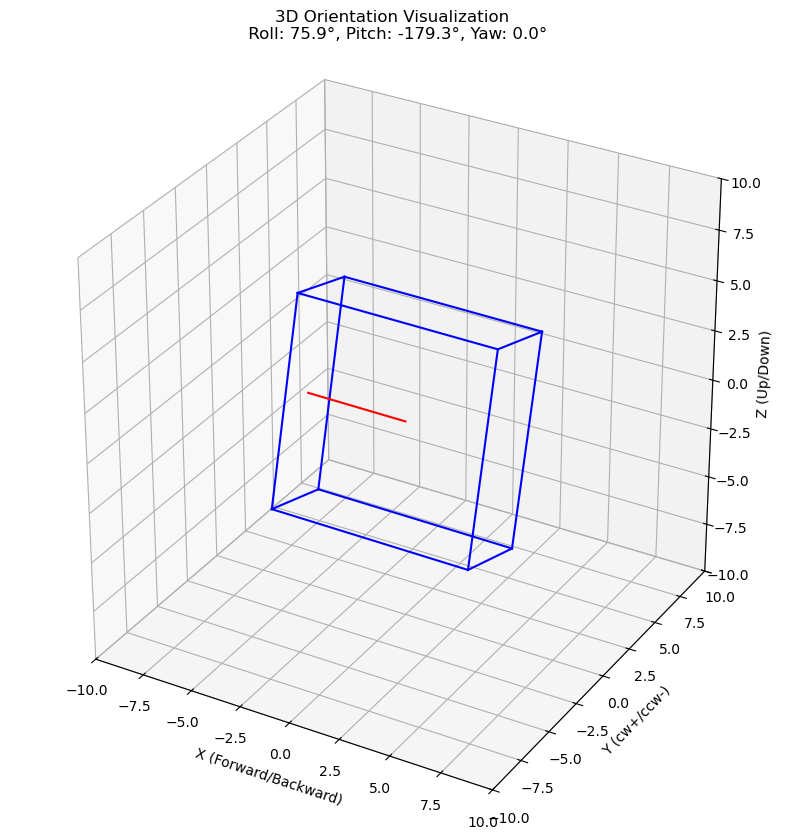

In [36]:
orient(5,5,2)